In [1]:
using WignerSymbols, SphericalHarmonics
using Plots; gr(); theme(:vibrant);
using Printf
using DataFrames
using LinearAlgebra
using Luxor
ENV["COLUMNS"]=200;
include("./LF_functions.jl");

# Ligand field theory

<div style="text-align: justify">
In this exercise you will construct a metal complex and compute the splitting of the d-orbitals in the electrostatic field of ligands. First, let us begin with necessary theory needed to understand the idea of the ligand field theory.</div>

## Basic principles
<div style="text-align: justify">
We start with a metal ion in vacuum, we restrict ourselves only to the d-orbitals and ignore all other shells. The d-orbitals are the solution of the Schrödinger equation of an ion in vacuum. In spherical coordinates we can write the d-orbital with a magnetic quantum number $m$ as:  
<br><center> $d_{m}(r,\theta,\phi) = R(r) \cdot Y^{m}_{l=2}(\theta,\phi)\tag{1}$ </center><br>
where $R(r)$ is the radial part and $Y^{m}_{l=2}(\theta,\phi)$ is the angular part in a form of a spherical harmonic. Now, lets add ligands around the metal ion, ligands will be represented by point charges. The potential of the ligand field with $N_L$ ligands with position $\mathbf{R}_i$ and charge $q_i$ at a point $\mathbf{r}$ is:
<br><center> $\hat{V}^\mathrm{LF}(\mathbf{r}) = \sum\limits_{i=1}^{N_L} \frac{q_i}{|\mathbf{R}_i - \mathbf{r}|}\tag{2}$ </center><br>
In the action of the ligand field the d-orbitals (defined in Eq. 1) are no longer a solution of the Schrödinger equation. The solution can be, however, obtained as a linear combination of the d-orbitals that has the lowest energy. The fact that the best wavefunction will have the lowest energy is called the <em>variational principle</em>.
To find the best wavefunction with the lowest energy we have to solve so-called secular equations. It is a set of $N$ coupled equations where $N$ is the number of basis functions. In our case $N$ is equal to 5, the basis functions are the d-orbitals with different magnetic quantum number $m_l = -l,\dots,l$ ($l=2$ for d-orbitals). The secular equation for a magnetic quantum number $m$ would have a form:
<center> 
    $\sum\limits_{m'=-2}^{2} c_{m'} \left( 
    \int\limits_0^\infty \int\limits_0^{\pi} \int\limits_0^{2\pi}
    ~d_{m'}^* \hat{V}^{LF} d_{m} ~ r^2\sin\theta\,\mathrm{d}\phi\mathrm{d}\theta\mathrm{d}r
    - \delta_{m',m}\epsilon \right)
    =0\tag{3}$ 
</center>
<center> 
    $\sum\limits_{m'=-2}^{2} c_{m'} \left( V_{m',m} - \delta_{m',m}\epsilon \right)
    =0\tag{4}$ 
</center>
<br>
where $\epsilon$ is the energy and $\delta_{m,m'}$ is the Kronecker-delta function. The integral in Eq. 3 represents the action of the ligand field potential on the $d_m$ orbital, multiplication from the left by a complex conjugated $d_{m'}$ orbital and integration over the whole space. These integrals are called the <em>resonance integrals</em>. In Eq. 4 we substituted the integral by term $V_{m',m}$ to simplify the whole expression. Secular equations are a system of coupled equations due to the presence of the sum over $m'$, which means that they cannot be solved individually.
To find the solution lets write all equations in a matrix form:
</div>

<center>
    $\begin{pmatrix} 
    V_{-2,-2}-\epsilon & V_{-2,-1} & V_{-2,0} & V_{-2,1} & V_{-2,2} \\
    V_{-1,-2} & V_{-1,-1}-\epsilon & V_{-1,0} & V_{-1,1} & V_{-1,2} \\
    V_{0,-2} & V_{0,-1} & V_{0,0}-\epsilon & V_{0,1} & V_{0,2} \\
    V_{1,-2} & V_{0,-1} & V_{1,0} & V_{1,1}-\epsilon & V_{1,2} \\
    V_{2,-2} & V_{2,-1} & V_{2,0} & V_{2,1} & V_{2,2}-\epsilon
    \end{pmatrix}
    \begin{pmatrix} c_{-2} \\ c_{-1} \\ c_0 \\ c_1 \\ c_2 \end{pmatrix} = 0\tag{5}$
</center>

<br>
<center> $ \left( \mathbf{V} - \mathbf{I}\epsilon \right) \mathbf{c} = 0\tag{6} $ </center>
<br>
Eq. 6 is only a compactly written Eq. 5, matrix $\mathbf{I}$ is the identity matrix. How can we then solve these equations? Linear algebra teaches us that the system of linear equations with the right-hand-side equals to $0$ will have a non-trivial solution ($\mathbf{c} \ne 0$) if and only if the determinant of the system (here the so-called <em>secular determinant</em>) is zero:
<br><center>
    $\det| \mathbf{V} - \mathbf{I}\epsilon | = 0 \tag{7}$
</center><br>
this is an algebraic equation for unknown $\epsilon$. In our case, the left-hand-side of Eq. 7 will be a polynomial of the 5-th order which means that we are going to find 5 values of $\epsilon$ as a solution. These will be the new energies of the d-orbitals in the ligand field potential!
</div>
<br><br>
<div style="text-align: justify">
Now, it is time to take a closer look to the resonance integrals that firstly appeared in Eq. 3. If we want to construct and solve the secular equations we need to evaluate these integrals. This is not an easy task from a mathematical point of view. Luckily enough, analytical expressions for the resonance integrals in the ligand field theory can be found in the literature. 
<br><center> 
    $ V_{m',m} = 
    \sum\limits_{i=1}^{N_L} q_i \left[ 
    A_{m',m} F_4(R_i) Y_4^{m'-m}(\theta_i,\phi_i) + 
    B_{m',m} F_2(R_i) Y_2^{m'-m}(\theta_i,\phi_i) +
    C_{m',m} F_0(R_i) Y_0^{m'-m}(\theta_i,\phi_i) \right]$
</center><br>
At a first glance this seems to be a quite complicated expression, but there is nothing to be afraid of. Lets break down the integral into individual terms.
</div>

#### Conclusion
<div style="text-align: justify">
And what is the take-away message for the reader? Lets recap the above part without any math. We started with a metal ion in vacuum, the solution of the Schrödinger equation was represented by 5 d-orbitals. Then, we added ligands around the metal ion as point charges. 
We tried to find a new solution of the Schrödinger equation with the potential of the ligands accounted in the Hamiltonian. To do that, we employed the variational principle which lead to a system of secular equations. By solving these equations we obtained the new energy levels of the d-orbitals in the ligand field. 
In the secular equation we had to evaluate the resonance integrals, here we made a use of prior work of chemists and physicists who already found the analytical expressions for these integrals. We have evaluated these integrals except for their radial part, which we treated as a parameter. Later on, we will find that these parameters can be obtained from spectroscopic or <em>ab inito</em> calculations.     
</div>

## Example: Metal-ion in a cubic field
        
Bellow you will find the example use of this notebook demonstrated on a metal ion in a cubic field or equally charge equidistant ligands.

### Creating the complex:
The positions of ligands in spherical coordinates have to be specified in arrays `ligands_θ` and `ligands_ϕ`, we assume that the distance to the metal ion is the same for all the ligands.
    
Geometry of cubic complex is demonstrated bellow:


    

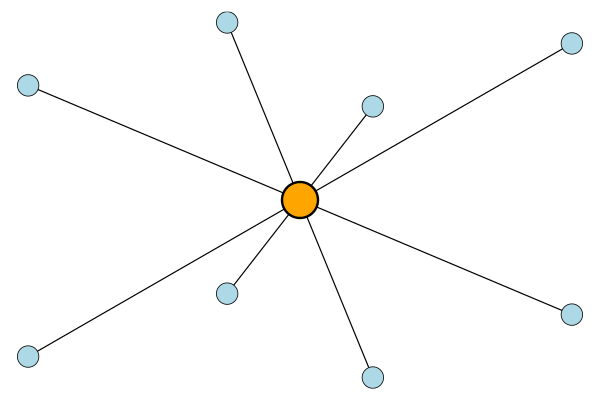

In [2]:
ligands_θ = [ pi/4, pi/4, pi/4, pi/4, pi*3/4, pi*3/4, pi*3/4, pi*3/4 ];
ligands_ϕ = [ pi/4, pi*3/4, pi*5/4, pi*7/4, pi/4, pi*3/4, pi*5/4, pi*7/4  ];
plot_ligs(ligands_θ, ligands_ϕ)

You can save the visualization of the complex with `savefig` function:

In [3]:
#savefig("cube.svg")

### Computing the total Hamiltonian in matrix representation
Function `construct_Htot` takes position of ligands as arguments and returns the total Hamiltonian with elements $< d_i | \hat{V} | d_j >$, where $\hat{V}$ represents a Coulomb interaction with all the ligands.

In [4]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 8.00 F0 - 0.57 F2 - 0.15 F4,,,,- 0.42 F4
2,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,,,
3,,,+ 8.00 F0 + 0.57 F2 - 0.93 F4,,
4,,,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,
5,- 0.42 F4,,,,+ 8.00 F0 - 0.57 F2 - 0.15 F4


Function `do_splitting` will plot the energy the new energy levels of the d-orbitals. This is done by solving the secular equations in form:
<center> $ det\left( \mathbf{H}^{tot} - \epsilon\mathbf{I} \right) = 0 $ </center>
The Slater-Condon parameters ($F_0$, $F_2$ and $F_4$) has to be provided.

*Absolute values of Slater-Condon parameters are arbitrary, do not use a large number so the new energies will be within the range of the plot. Parameter $F_0$ should not be larger than 0.3.*

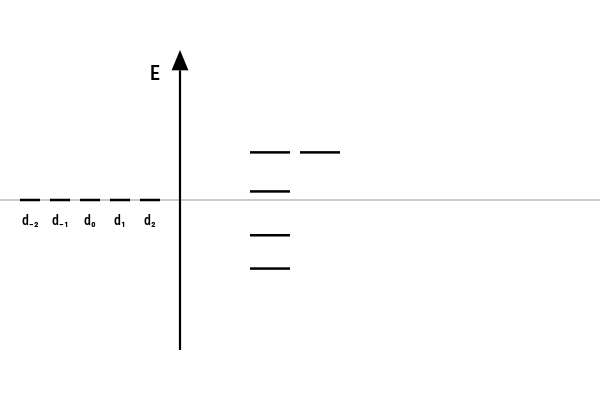

In [5]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=2, f4=1)

## Exercise 1: Optical transitions in [Cr(H$_2$O)$_6$]$^{3+}$
- **Prepare a metal-ion in an octahedral field**
 - Determine the spherical coordinates of ligands in octahedral arrangement.
 - *Hint: Draw the definition of spherical coordinates*
- **Compute total Hamiltonian in matrix representation with d-orbitals as basis**
 - Discuss the meaning of Slater-Condon parameters in the matrix elements.
 - Can you disentagnle the shift of d-orbitals to higher energies and their splitting just from the total Hamiltonian?
 - The total Hamiltonian is computed in the basis of d$_{-2}$, d$_{-1}$, d$_0$, d$_1$ and d$_2$. What is the relation between these orbitals and orbitals d$_{z^2}$, d$_{xz}$, d$_{xy}$, d$_{yz}$ and d$_{x^2-y^2}$? 
- **Explore the effect of symmetry perturbation**
  - Make a small displacements of the ligand position in order to break the octahedral symmetry.
  - Compute again the total Hamiltonian and splitting of the d-orbitals.
  - Compare with the symmetric case and discuss the results.

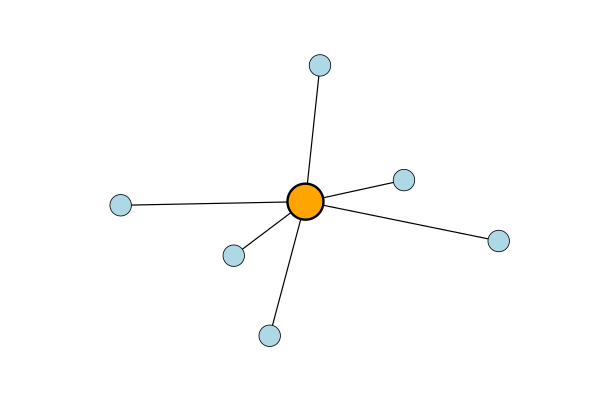

In [6]:
ligands_θ = [ pi/2, pi/2, pi/2, pi/2, 0, pi ] .+ rand(6)/pi;
ligands_ϕ = [ 0, pi/2, pi, 3*pi/2, 0, 0 ] .+ rand(6)/pi;

p = plot_ligs(ligands_θ, ligands_ϕ)

In [7]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 6.00 F0 - 0.03 F2 + 0.14 F4,+ 0.02 F2 - 0.08 F4,+ 0.02 F2 + 0.05 F4,+ 0.00 F4,+ 0.64 F4
2,+ 0.02 F2 - 0.08 F4,+ 6.00 F0 + 0.02 F2 - 0.55 F4,+ 0.01 F2 + 0.20 F4,+ 0.03 F2 - 0.08 F4,- 0.00 F4
3,+ 0.02 F2 + 0.05 F4,+ 0.01 F2 + 0.20 F4,+ 6.00 F0 + 0.03 F2 + 0.83 F4,- 0.01 F2 - 0.20 F4,+ 0.02 F2 + 0.05 F4
4,+ 0.00 F4,+ 0.03 F2 - 0.08 F4,- 0.01 F2 - 0.20 F4,+ 6.00 F0 + 0.02 F2 - 0.55 F4,- 0.02 F2 + 0.08 F4
5,+ 0.64 F4,- 0.00 F4,+ 0.02 F2 + 0.05 F4,- 0.02 F2 + 0.08 F4,+ 6.00 F0 - 0.03 F2 + 0.14 F4


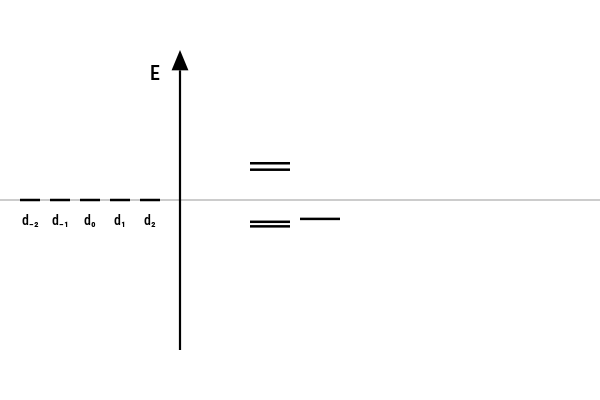

In [8]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=0.2, f4=1)

## Exercise 2: *Ab initio* calculation